<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/6_Ensamble/ejercicios/ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Práctica Ensambles I

## Consignas
El objetivo de esta práctica es comparar la performance de diferentes clasificadores basados en ensamble learning y un clasificador simple (árbol de decisión, regresión logística u otros).

**1. Cargamos los paquetes a utilizar**


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
import numpy as np
from matplotlib import pyplot as plt

**2. Importamos el dataset mnist**

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

Se trata de un dataset de digitos escritos a mano. 

Los dígitos se normalizaron en tamaño y se centraron en una imagen de tamaño fijo. Es una buena base de datos para las personas que desean probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos del mundo real mientras dedican un esfuerzo mínimo al preprocesamiento y formateo. 

Las imágenes originales en blanco y negro (dos niveles) del NIST se normalizaron en tamaño para que cupieran en un cuadro de 20 x 20 píxeles conservando su relación de aspecto. 

Las imágenes resultantes contienen niveles de gris como resultado de la técnica de suavizado utilizada por el algoritmo de normalización. las imágenes se centraron en una imagen de 28x28 calculando el centro de masa de los píxeles y traduciendo la imagen para posicionar este punto en el centro del campo de 28x28.

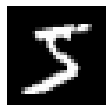

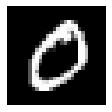

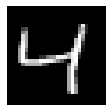

In [ ]:
for i in range(0,3):
  plt.subplot(130 + 1 + i)
  d = np.array(mnist.data[i,:]).reshape(28, 28)
  plt.imshow(d, cmap=plt.get_cmap('gray'))
  plt.axis('off')
  plt.show()

**3. Dividimos en train y test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        mnist.data, mnist.target, test_size=10000, random_state=42)

>> ¿Qué forma/dimensión tienen los datos?

**4. Instanciamos los clasificadores**

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
adboost_clf = AdaBoostClassifier(random_state=42)

**5. Hacemos el entrenamiento de cada uno de los modelos elegidos**

In [ ]:
estimators = [tree_clf, svm_clf, random_forest_clf, extra_trees_clf, adboost_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the DecisionTreeClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the AdaBoostClassifier(random_state=42)


**6. Evaluamos los resultados**

> ¿Cuál sería la métrica más adecuada para evaluar estos modelos?

> ¿Cuál es el mejor modelo?

> ¿Qué diferencias ven entre los clasificadores?


Una solución rápida para revisar la performance global...

In [ ]:
[{(estimator.__class__.__name__):estimator.score(X_test, y_test)} for estimator in estimators]

[{'DecisionTreeClassifier': 0.8703},
 {'LinearSVC': 0.8416},
 {'RandomForestClassifier': 0.9674},
 {'ExtraTreesClassifier': 0.9682},
 {'AdaBoostClassifier': 0.7331}]

Una solución rápida para revisar la performance por cada clase...

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import pandas as pd

In [ ]:
reports = []
for estimator in estimators:
  y_test_pred = estimator.predict(X_test)
  print(estimator.__class__.__name__)
  print(classification_report(y_test_pred, y_test))

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       974
           1       0.96      0.95      0.95      1172
           2       0.85      0.82      0.84       998
           3       0.83      0.83      0.83      1035
           4       0.86      0.86      0.86       912
           5       0.81      0.83      0.82       920
           6       0.90      0.89      0.90       973
           7       0.91      0.91      0.91      1051
           8       0.78      0.82      0.80       927
           9       0.85      0.85      0.85      1038

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

LinearSVC
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1045
           1       0.98      0.88      0.93      1276
           2       0.81      0.87      0.84  

Una solución más bonita para poder graficar y que quede todo más prolijo...

In [ ]:
def get_tidy_classification_report(estimator_list, X, y):
  
  reports = pd.DataFrame()
  
  for estimator in estimator_list:
    y_test_pred = estimator.predict(X)
    re = classification_report(y_test_pred, y, output_dict=True)
    re.update({'classifier': estimator.__class__.__name__})
    re = pd.DataFrame(re)
    re.reset_index(inplace=True)
    re = re.rename(columns = {'index':'metric'})
    reports = reports.append(re, ignore_index = True)

  reports = pd.melt(reports, id_vars=['classifier', 'metric'], value_vars=re.columns[1:14],
                    var_name='class_label')
  return(reports)

In [ ]:
class_reports = get_tidy_classification_report(estimator_list=estimators,
                                                X=X_test,
                                                y=y_test)

class_reports.head()

,classifier,metric,class_label,value
0,DecisionTreeClassifier,precision,0,0.919634
1,DecisionTreeClassifier,recall,0,0.928131
2,DecisionTreeClassifier,f1-score,0,0.923863
3,DecisionTreeClassifier,support,0,974.000000
4,LinearSVC,precision,0,0.963377


<Figure size 1080x576 with 0 Axes>

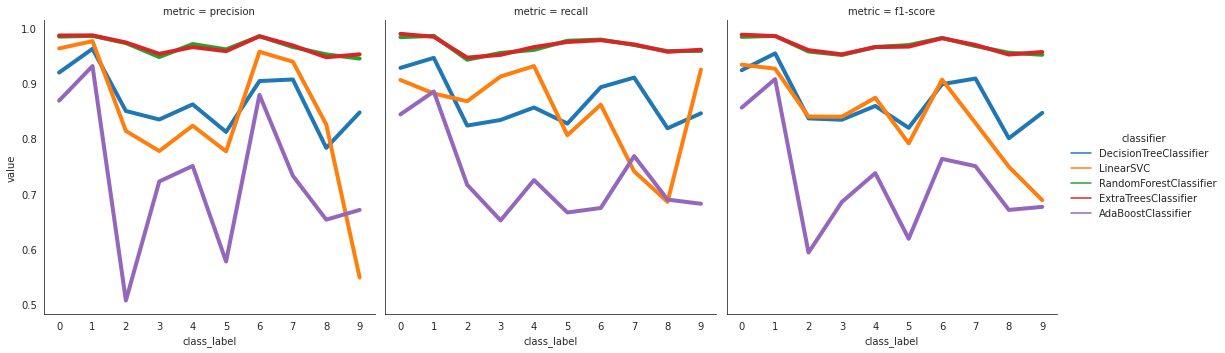

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))

sns.set_style(style='white') 

g = sns.relplot(
    data=class_reports[(class_reports['metric']!='support') & ~(class_reports['class_label'].isin(['weighted avg', 'macro avg', 'accuracy']))], # Filtramos las métricas agregadas
    x="class_label", y="value", col="metric", hue="classifier",
    kind="line", palette="tab10", linewidth=4, zorder=5,
    col_wrap=3,legend=True,
);

g

**7. Mejorando los resultados?**

> ¿Qué podría hacerse para mejorar la performance de los diferentes modelos?

> ¿Cuál es el modelo que podría tunearse de forma mpas efectiva?  Avanzar en el tuneo de los hiperparámetros del mismo

In [ ]:
## No correr ahora porque tarda mucho
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV


# Definimos la grilla de valores sobre los que vamos a buscar
grid = dict()
grid['n_estimators'] = [100, 250, 500]
grid['learning_rate'] = [0.0001, 0.001 0.01, 0.1, 1.0]

# Seteamos el modo de evaluación
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Definimos el proceso de búsqueda (en este caso, exhaustivo)
grid_search = GridSearchCV(estimator=adboost_clf, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring='f1',
                           verbose=1)

# Ejecutamos la búsqueda
grid_result = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,


CPU times: user 2min 52s, sys: 3.1 s, total: 2min 55s
Wall time: 51min 27s
